In [ ]:
# POSTOP REVIS SCL FISTUL
# TRABECULECTOM AB EXTERNO
# GONIOSYNECHIAE LYSIS
# TRABECULOTOMY AB EXTERNO
# FACILIT INTRAOC CIRC NEC
# CYCLOPHOTOCOAGULATION

GLAUCOMA_OPERATIONS = ['POSTOP REVIS SCL FISTUL', 
                       'TRABECULECTOM AB EXTERNO',
                       'GONIOSYNECHIAE LYSIS',
                       'TRABECULOTOMY AB EXTERNO',
                       'FACILIT INTRAOC CIRC NEC',
                       'CYCLOPHOTOCOAGULATION']


OPERATIONS_FILES = ['6223156_Glaucoma_operation_2009-2019_KCC.xlsx',
                    '6223175_Glaucoma_operation_2011-2019_KEC_with_reference_number.xlsx',
                    '6223179_Glaucoma_operation_2009 2019 NTEC.xlsx',
                    '6228401_Glaucoma_operation_2009-2019 NTWC.xlsx',
                    'Glaucoma operations HKEC 2009 2019.xlsx',
                    'Glaucoma_operation_2009 2019 KWC.xlsx',
                    '6211789_Glaucoma_operation_2009-2019_with_reference_number.xlsx']

import os

os.chdir(r'C:\Users\yawen\Downloads\Summary\overall')

In [ ]:
import pandas as pd
import numpy as np 
from datetime import datetime 

operations_tables = []
for excel_file in OPERATIONS_FILES:
    operations_table = pd.read_excel(excel_file, usecols="A,E,K")
    operations_table_values = operations_table.values
    
    # filter glaucoma opeations only

    eliminated_labels = []
    for label in range(len(operations_table)):
        if operations_table_values[label][2] not in GLAUCOMA_OPERATIONS:
            eliminated_labels.append(label)
        try:
            date = datetime.strptime(operations_table_values[label][1], "%Y-%m-%d")
#             if date.year != 2019:
#                 eliminated_labels.append(label)

        except:
            eliminated_labels.append(label)

    operations_table = operations_table.drop(eliminated_labels)

    operations_tables.append(operations_table)
    
    print(excel_file)
    print("No. of operations:", len(operations_table['Reference Key']))

    print(len(list(set(operations_table['Reference Key']))))
    
    
    
operations_tables = pd.concat(operations_tables)
print(operations_tables)

In [ ]:
# summary the counts and numbers
print(operations_tables['Reference Key'].value_counts().value_counts())

# summary no. of each operations
operations_tables['Procedure Description (rank 1)'].value_counts()

In [ ]:
import os
import pandas as pd
all_ids = []
medication_year_dict = {}
root_dir = 'C:\\Users\\coved\\Desktop\\CDADS\\Summary\\overall\\'
for filename in os.listdir(root_dir):
    if 'Summary' in filename:
        year = filename[-9:-5]
        excel_file = pd.read_excel(root_dir + filename)
        filtered_subjects = excel_file[excel_file.iloc[:,1]>0]
        all_ids += list(filtered_subjects["Reference_id"])
        if year not in medication_year_dict:
            medication_year_dict[year] = [float(i) for i in list(filtered_subjects["Reference_id"])]
        else:
            for i in list(filtered_subjects["Reference_id"]):
                medication_year_dict[year].append(float(i))
            
            
all_ids = list(dict.fromkeys(all_ids))
print(len(all_ids))

In [97]:
# all combined files
from tqdm import tqdm

import os
import pandas as pd
combined = []
root_dir = 'C:\\Users\\coved\\Desktop\\CDADS\\Summary\\overall\\'
for filename in tqdm(os.listdir(root_dir)):
    year = filename[-9:-5]
    if 'HKWC' in filename:

        if 'diagnoses'  in filename:
            excel_file = pd.read_excel(root_dir + filename, usecols=[0,1])
            combined.append(excel_file)
                
        
combined = pd.concat(combined)
print(combined)
combined.to_csv('combined.csv')





100%|████████████████████████████████████████████████████████████████████████████████| 322/322 [02:04<00:00,  2.58it/s]


       Reference Key                           OP Appointment
0               2713      QMH:GERM10101944:2013-03-28:MED:GER
1               2713      QMH:GERM10101944:2013-09-26:MED:GER
2               2713      QMH:QEYE08112227:2013-06-05:OPH:OPH
3               2713      QMH:QEYE08112227:2013-11-14:OPH:OPH
4               4604      QMH:GDC11310014Y:2013-04-03:ORT:ORT
...              ...                                      ...
16146       12287428       GH:POPH1910083H:2019-12-27:OPH:OPH
16147       12314855  QMH:SVAS19106766:2019-09-17:SUR:GEN_SUR
16148       12314855  QMH:SVAS19106766:2019-11-19:SUR:GEN_SUR
16149       12415700       GH:GEYE1916482K:2019-11-05:OPH:OPH
16150       12443541       GH:GEYE1917690J:2019-12-27:OPH:OPH

[185733 rows x 2 columns]


In [88]:
# all combined files
from tqdm import tqdm

import os
import pandas as pd
all_ids = []
medication_year_dict = {}
root_dir = 'C:\\Users\\coved\\Desktop\\CDADS\\Summary\\overall\\'
for filename in tqdm(os.listdir(root_dir)):
    try:
        year = filename[-9:-5]
        # HKWC' in filename:
        if True:
            excel_file = pd.read_excel(root_dir + filename, usecols=[0,1])

            if 'Summary'  in filename:
                excel_df = excel_file.iloc[:, 0][excel_file.iloc[:, 1]>=180]
                all_ids += list(set([float(x) for x in excel_df.values]))

            else:
                excel_df = excel_file.iloc[:, 0]
                all_ids += list(set([float(x) for x in excel_df.values]))


        if year not in medication_year_dict:
            medication_year_dict[year] = list(set([float(x) for x in excel_df.values]))
        else:
            medication_year_dict[year] +=list(set([float(x) for x in excel_df.values]))
    except:
        print(filename)




 24%|███████████████████▎                                                             | 77/324 [02:44<00:35,  6.96it/s]

6333453_Glaucoma_laser_NTEC_2012.xlsx


 54%|███████████████████████████████████████████▍                                    | 176/324 [04:18<11:02,  4.48s/it]

6343842_Glaucoma_diagnoses_NTWC_2012.xlsx


 61%|████████████████████████████████████████████████▋                               | 197/324 [06:57<24:00, 11.34s/it]

Glaucoma diagnoses HKEC 2019.xlsx


100%|████████████████████████████████████████████████████████████████████████████████| 324/324 [20:05<00:00,  3.72s/it]

~$Glaucoma diagnoses NTWC 2011.xlsx
~$Glaucoma_operation_2009 2019 KWC.xlsx


In [ ]:
# all combined files
from tqdm import tqdm

import os
import pandas as pd
# all_ids = []
# medication_year_dict = {}
root_dir = 'C:\\Users\\coved\\Desktop\\CDADS\\Summary\\overall\\'
for filename in tqdm(os.listdir(root_dir)):
        print(filename)
        year = filename[-9:-5]
        if 'Summary' in filename and 'HKWC' in filename:

            excel_file = pd.read_excel(root_dir + filename, usecols=[0,1])
        
            excel_df = excel_file.iloc[:, 0] # [excel_file.iloc[:, 1]>=180]
            all_ids += list(excel_df.values)
            print(excel_df)


        if year not in medication_year_dict:
            medication_year_dict[year] = list(set(list([float(i) for i in list(excel_file.iloc[:, [0]].values[:,0])])))
        else:
            medication_year_dict[year] +=list(set(list([float(i) for i in list(excel_file.iloc[:, [0]].values[:,0])])))

        

In [16]:
medication_year_dict["2009"]

[5242882.0,
 3440643.0,
 1597444.0,
 7651330.0,
 4030470.0,
 6250504.0,
 10510345.0,
 2695178.0,
 671755.0,
 4243467.0,
 12066829.0,
 278542.0,
 4284433.0,
 2826259.0,
 8667156.0,
 5988375.0,
 7176219.0,
 5226524.0,
 7684125.0,
 11558943.0,
 4702242.0,
 7389219.0,
 6651940.0,
 4309033.0,
 884778.0,
 2883626.0,
 2826284.0,
 2867245.0,
 4653101.0,
 8239.0,
 12058674.0,
 2121784.0,
 7102522.0,
 860219.0,
 286782.0,
 2121790.0,
 2752574.0,
 1294402.0,
 4202563.0,
 4677700.0,
 8593475.0,
 7618632.0,
 2121801.0,
 2826314.0,
 876621.0,
 4087885.0,
 5980241.0,
 1335378.0,
 4128852.0,
 860246.0,
 7782486.0,
 3522649.0,
 2007131.0,
 3719259.0,
 4677726.0,
 5128288.0,
 7422049.0,
 8650849.0,
 2056296.0,
 4218986.0,
 7651435.0,
 2334832.0,
 4030577.0,
 2113650.0,
 2457714.0,
 884852.0,
 2703478.0,
 2752630.0,
 32888.0,
 8061046.0,
 8601722.0,
 901245.0,
 11059327.0,
 5808257.0,
 884866.0,
 2695298.0,
 3350665.0,
 3784841.0,
 876683.0,
 860300.0,
 254097.0,
 4374674.0,
 5333137.0,
 5709969.0,
 4038

In [42]:
for x in all_ids:
    print(float(x))

2966274.0
7431683.0
5697796.0
4939405.0
1005970.0
7607954.0
1037974.0
1092892.0
5485085.0
8392605.0
3974175.0
3932192.0
176807.0
885289.0
8463401.0
290219.0
856748.0
4182188.0
885934.0
6331567.0
8163375.0
2202290.0
274869.0
2966074.0
7019324.0
2241734.0
3988935.0
3000649.0
885710.0
4524378.0
1099227.0
274012.0
5844830.0
7246440.0
866156.0
7569019.0
3090558.0
2662143.0
5697796.0
7356815.0
264208.0
7607954.0
913044.0
8668052.0
2828567.0
1092892.0
274076.0
7445791.0
8447520.0
9088162.0
2845989.0
279590.0
4161578.0
290219.0
4182188.0
6633264.0
5158325.0
4845239.0
263992.0
5592376.0
6603582.0
948545.0
92994.0
2751682.0
3082305.0
2364357.0
2241734.0
864201.0
271818.0
863306.0
929740.0
271309.0
6366541.0
6674254.0
879441.0
279896.0
872026.0
3876831.0
3687907.0
3512548.0
6644071.0
2119403.0
3566317.0
7293806.0
3281263.0
9008750.0
937841.0
5980275.0
3395191.0
2114680.0
565755.0
3473409.0
2023426.0
7651330.0
671755.0
4243467.0
6037516.0
892948.0
5439510.0
2121753.0
3932192.0
876579.0
6062117.0
1

2693933.0
670510.0
4848431.0
5823277.0
5651256.0
3504956.0
7019324.0
10566461.0
875327.0
3406655.0
2644804.0
858949.0
891717.0
2202437.0
6331209.0
2693962.0
285516.0
2612045.0
4275020.0
6708049.0
7101269.0
2825047.0
277337.0
1792858.0
3570521.0
6544220.0
7281500.0
1047393.0
867170.0
2333537.0
908132.0
260968.0
5487471.0
6822771.0
2333562.0
252797.0
4955007.0
5290882.0
285572.0
867213.0
2866065.0
3562387.0
2694036.0
8117140.0
3095448.0
3963801.0
2612122.0
916380.0
4717469.0
2825120.0
5634978.0
1375141.0
6790054.0
2120618.0
891819.0
3906480.0
4201395.0
5045172.0
2825144.0
875449.0
867270.0
2702280.0
2333642.0
744399.0
285653.0
4234198.0
2186200.0
269276.0
2948061.0
515038.0
2743262.0
5872605.0
9026527.0
2128867.0
4840419.0
4758503.0
4062187.0
7216107.0
941037.0
6093805.0
7101425.0
9796594.0
8387571.0
2112502.0
4840439.0
6478838.0
875513.0
4406265.0
2120699.0
859137.0
908289.0
7257091.0
130053.0
4160521.0
2694155.0
3841036.0
2833421.0
2694159.0
8682514.0
154643.0
39965.0
6511647.0
883747.

2463325.0
5863007.0
6346340.0
2750055.0
2193000.0
7108204.0
1250925.0
2143854.0
2692720.0
890483.0
2233974.0
1029751.0
554616.0
923256.0
2324091.0
3356287.0
284288.0
906881.0
3962497.0
145029.0
6821513.0
857739.0
10491537.0
2340498.0
2750099.0
5281426.0
7607954.0
865942.0
1037974.0
2332312.0
8844946.0
857754.0
1029786.0
3913370.0
4159134.0
6469281.0
13986.0
4716195.0
6067875.0
947885.0
2037423.0
267952.0
95921.0
1005233.0
2086576.0
4544175.0
5314234.0
2111165.0
857790.0
2324158.0
6051520.0
6657725.0
267970.0
5027527.0
2741962.0
145099.0
898763.0
3626703.0
2201299.0
8222419.0
4003541.0
341718.0
6502102.0
5851.0
6502113.0
2692838.0
7845606.0
6723304.0
95979.0
2119403.0
6788843.0
4011760.0
7042801.0
14066.0
890610.0
1595122.0
2324212.0
2397942.0
3094260.0
5117682.0
5699321.0
6403833.0
2324221.0
874238.0
2389757.0
2971393.0
907010.0
3315457.0
3282693.0
3299078.0
2692871.0
2692877.0
2758413.0
7051025.0
3299091.0
857879.0
939801.0
87847.0
2692906.0
153387.0
874285.0
6633264.0
4831025.0
78784

867213.0
2849681.0
2694036.0
4070293.0
8117140.0
2931607.0
3095448.0
8149910.0
2612122.0
2751386.0
916380.0
4717469.0
11352991.0
916384.0
2825120.0
5634978.0
252835.0
2112420.0
1375141.0
2120618.0
891819.0
1792940.0
5012398.0
2333615.0
3906480.0
2186162.0
5045172.0
3103676.0
6544323.0
5602244.0
2702280.0
3013581.0
744399.0
883664.0
285653.0
179158.0
2186200.0
269276.0
10460124.0
515038.0
2743262.0
5749728.0
2128867.0
252903.0
4758503.0
941037.0
6093805.0
6487021.0
10730479.0
7101425.0
2186229.0
2112502.0
4840439.0
4406265.0
2120699.0
4578301.0
908289.0
7257091.0
9305095.0
4160521.0
3841036.0
2694159.0
3300367.0
6511647.0
7257119.0
1621025.0
883747.0
154660.0
2825253.0
6331439.0
31794.0
2923570.0
318516.0
883765.0
3005494.0
4037684.0
7478325.0
15424.0
2464835.0
2800707.0
875590.0
1006664.0
6446156.0
2743375.0
900181.0
2694229.0
2825306.0
3292254.0
2333791.0
253025.0
6003810.0
285798.0
916591.0
2825327.0
826482.0
6151284.0
883831.0
867448.0
7293.0
908413.0
2391166.0
572544.0
2112641.0
39

921560.0
1028056.0
5230555.0
2781152.0
2740198.0
5935082.0
2338799.0
1028082.0
2117621.0
2396149.0
1028093.0
5296126.0
266246.0
2109449.0
1011722.0
118798.0
4894736.0
897041.0
4763665.0
921621.0
913431.0
888857.0
266273.0
2134049.0
921639.0
4730919.0
864297.0
4138.0
2740270.0
4272175.0
8163375.0
5197888.0
5681216.0
2117705.0
4452436.0
897111.0
4173917.0
872549.0
872556.0
6066284.0
880762.0
4468860.0
6721670.0
6738058.0
864396.0
6230158.0
2166937.0
2740378.0
5197978.0
872606.0
872616.0
4182188.0
3780782.0
2224304.0
4616374.0
872631.0
6320312.0
2846906.0
2109631.0
872645.0
7114962.0
905427.0
864477.0
938211.0
274660.0
4133093.0
2330861.0
6123772.0
5697796.0
880901.0
856327.0
5583116.0
266530.0
2732328.0
2732335.0
6926646.0
905538.0
2011466.0
856396.0
1028428.0
8835409.0
6041942.0
2117981.0
3084645.0
6123883.0
2117997.0
3281263.0
889220.0
3010953.0
2388364.0
2740620.0
881049.0
856474.0
1028506.0
7287194.0
856478.0
6984095.0
6132145.0
274868.0
274869.0
266678.0
2109886.0
4436416.0
2118082.

7193787.0
6194366.0
869567.0
6702275.0
2008261.0
2483399.0
2163913.0
877770.0
263374.0
869586.0
148692.0
6440148.0
2811094.0
2868442.0
4752602.0
2024668.0
2122977.0
2499810.0
877801.0
869613.0
2172142.0
8447213.0
886000.0
148722.0
263413.0
402681.0
3925249.0
263426.0
4244741.0
6890765.0
2336014.0
427281.0
255254.0
3417367.0
2114841.0
6759710.0
5580065.0
877859.0
6366500.0
296231.0
6538535.0
140585.0
935210.0
6604075.0
5014830.0
4998450.0
4842804.0
869685.0
1402167.0
107835.0
2999614.0
4261182.0
288066.0
288070.0
410951.0
288077.0
2114893.0
2999630.0
3499348.0
886101.0
7439700.0
9463127.0
271710.0
296289.0
877923.0
6088037.0
2106731.0
2811243.0
3851629.0
5940594.0
2966899.0
869749.0
877945.0
869754.0
910718.0
877951.0
10511748.0
124294.0
17799.0
4162950.0
681353.0
869773.0
2008464.0
9545106.0
255381.0
9414037.0
877976.0
7120284.0
2508195.0
7333289.0
296363.0
894382.0
271796.0
279991.0
2336190.0
7390654.0
869825.0
2868673.0
2155973.0
271818.0
2704843.0
2827724.0
910798.0
1533392.0
521160

4467941.0
7048422.0
6466804.0
871671.0
134395.0
2829563.0
7482619.0
896254.0
2338047.0
888065.0
4115722.0
7081227.0
2387215.0
879888.0
2805010.0
8097050.0
1092892.0
2329887.0
2845989.0
281898.0
896298.0
126252.0
871729.0
3763506.0
5827889.0
5516605.0
3091774.0
5672254.0
2862407.0
3083595.0
879948.0
871758.0
2829647.0
2026846.0
273762.0
879971.0
7212392.0
3902826.0
2780523.0
6540652.0
9014641.0
2624887.0
175484.0
2346364.0
4844925.0
8138111.0
6630790.0
2837897.0
6950285.0
2846100.0
265621.0
2534810.0
4730266.0
4083102.0
6778276.0
7581097.0
265643.0
290219.0
863665.0
265651.0
7826869.0
2158006.0
265655.0
4214202.0
2338235.0
937406.0
265663.0
6213057.0
9285058.0
921027.0
8613315.0
2371014.0
7572934.0
2141644.0
2608591.0
871888.0
1846743.0
4476379.0
5238235.0
6041053.0
19937.0
863715.0
921060.0
6122979.0
2756070.0
3689958.0
118253.0
2223598.0
962032.0
3304946.0
6213108.0
4402679.0
3821048.0
290303.0
912895.0
1027588.0
6368774.0
282123.0
5705228.0
2321933.0
4525581.0
2215445.0
2625046.0
672

962032.0
2616816.0
4722163.0
6213108.0
3378680.0
3821048.0
4132345.0
290303.0
1027588.0
3001866.0
282123.0
5705228.0
2321933.0
3010062.0
2215445.0
2625046.0
6729238.0
7138845.0
2338334.0
2338335.0
6770206.0
642595.0
3042852.0
8842787.0
265767.0
4181544.0
7327274.0
945707.0
970285.0
5344814.0
3362351.0
7015985.0
1003058.0
8252979.0
871988.0
2330166.0
4173367.0
912953.0
2108988.0
257597.0
2117182.0
2330178.0
2125382.0
5344839.0
880200.0
2321992.0
921162.0
4943434.0
7204424.0
9678411.0
872017.0
1011281.0
290387.0
298579.0
708179.0
2166355.0
5459542.0
872024.0
1044057.0
4034136.0
7245394.0
274012.0
7499355.0
7941717.0
10649312.0
888416.0
5246562.0
9760356.0
6172261.0
6631014.0
2035304.0
4288104.0
5467754.0
2027115.0
3042924.0
4935275.0
2846319.0
10751600.0
888434.0
4255347.0
1904244.0
265845.0
3702.0
3083892.0
3395191.0
4632185.0
863866.0
880250.0
8302201.0
1003133.0
8834684.0
5238399.0
1003138.0
2322057.0
2141834.0
6172298.0
3042956.0
945806.0
921233.0
4271764.0
7384727.0
5688984.0
100316

5663466.0
3566317.0
4238063.0
5401327.0
6900465.0
7015155.0
3091192.0
9071353.0
2116349.0
2116353.0
2616065.0
6171394.0
887556.0
5081860.0
2329353.0
895755.0
5032717.0
641806.0
879375.0
3738386.0
224021.0
1248021.0
3492629.0
5106454.0
5647129.0
6531861.0
6728469.0
10013465.0
2157342.0
3738399.0
35617.0
264995.0
2116388.0
264997.0
6982436.0
863015.0
5294887.0
1256233.0
1026858.0
10619688.0
871212.0
2829101.0
674606.0
2829102.0
3001136.0
4082481.0
7228208.0
11037482.0
2353973.0
2927413.0
2337591.0
7252790.0
903997.0
904003.0
6368068.0
297798.0
8047431.0
256841.0
2984778.0
3345225.0
928588.0
3558219.0
7252812.0
256847.0
879441.0
2132817.0
2665297.0
4074326.0
5991260.0
9341788.0
2968414.0
10218335.0
8392444.0
4959077.0
265062.0
7564135.0
3042152.0
641897.0
281454.0
863086.0
5794670.0
5655410.0
2329459.0
4778868.0
7211890.0
142201.0
3894138.0
6605691.0
2116477.0
256895.0
5311360.0
1133441.0
2329474.0
3083139.0
945028.0
871301.0
7392132.0
2861959.0
5598088.0
7654273.0
10292109.0
5909394.0
30

2338235.0
937406.0
2608574.0
937409.0
9285058.0
175557.0
2371014.0
7572934.0
4566473.0
2387409.0
6049233.0
1846743.0
12062169.0
4476379.0
19937.0
921060.0
2756070.0
3689958.0
101868.0
4722163.0
8449523.0
126461.0
10038789.0
2346504.0
2338313.0
5705228.0
2321933.0
3010062.0
2215445.0
2625046.0
880155.0
7138845.0
2338335.0
642595.0
3042852.0
265767.0
4181544.0
10276392.0
945707.0
5344814.0
7015985.0
1003058.0
7163441.0
2108988.0
2330178.0
2125382.0
5344839.0
921162.0
4943434.0
7335503.0
872017.0
1011281.0
290387.0
708179.0
2166355.0
7941717.0
4034136.0
1044057.0
7499355.0
274012.0
2338396.0
20062.0
896607.0
5246562.0
6172261.0
5721702.0
4812391.0
2035304.0
4288104.0
6631014.0
2027115.0
4935275.0
888434.0
265845.0
675449.0
863866.0
880250.0
4632185.0
1003133.0
4730489.0
5238399.0
8302201.0
8171141.0
2322057.0
2141834.0
2870923.0
3042956.0
6172298.0
945806.0
4271764.0
7384727.0
1003165.0
2158240.0
5197478.0
7360166.0
10497703.0
2387627.0
2404011.0
921264.0
2371249.0
896692.0
896697.0
10277

2716294.0
897672.0
643723.0
2216587.0
5845645.0
2118286.0
742031.0
8106646.0
2609817.0
4747932.0
10179228.0
6894240.0
94881.0
283298.0
291491.0
144037.0
176807.0
11940519.0
5329587.0
6083253.0
3486390.0
5124790.0
6656693.0
3953339.0
2609855.0
2806465.0
7443138.0
29379.0
275142.0
2118342.0
4690632.0
2110154.0
12415700.0
5321430.0
4412119.0
12178135.0
684761.0
5190362.0
29411.0
856811.0
3044075.0
3715820.0
7844591.0
1856241.0
938738.0
7598835.0
3429109.0
7369461.0
10195702.0
897794.0
4207364.0
3789574.0
865034.0
865035.0
4649742.0
9286414.0
2134800.0
2159376.0
4018962.0
258835.0
856854.0
7254807.0
660248.0
8926893.0
10662679.0
856860.0
3609374.0
7394081.0
5993252.0
2118438.0
10384174.0
2741040.0
6828854.0
3633977.0
267070.0
3773250.0
2388808.0
4551496.0
283467.0
865099.0
283469.0
7476045.0
873295.0
2356047.0
8958797.0
7983964.0
2331488.0
4043617.0
856931.0
5215076.0
3584869.0
29542.0
185202.0
2159475.0
3666803.0
6148980.0
7164791.0
103290.0
299899.0
2249595.0
856961.0
2945921.0
2610056.0

2167783.0
2143209.0
5764071.0
308206.0
3937263.0
6034414.0
8350545.0
8262647.0
1029112.0
2831352.0
5387258.0
7287800.0
881661.0
914429.0
3044350.0
7246848.0
8655874.0
5297158.0
11564039.0
5977096.0
8958985.0
267274.0
11523081.0
300047.0
1102867.0
6132759.0
5870617.0
291866.0
873498.0
8889498.0
3396648.0
6886443.0
5911597.0
6517805.0
7902253.0
881712.0
11924525.0
4101170.0
5731379.0
6730803.0
54328.0
7369786.0
881728.0
3675200.0
7787586.0
8442948.0
4551753.0
3003468.0
2217038.0
4666446.0
2970704.0
10703951.0
4527191.0
4600920.0
2339930.0
201821.0
1848415.0
9253986.0
848995.0
889956.0
7083112.0
5665898.0
4830315.0
1799277.0
4117614.0
4920431.0
881776.0
5862513.0
6149230.0
9294961.0
1250421.0
881783.0
668793.0
8352890.0
4117631.0
2061442.0
6730882.0
4568198.0
267400.0
7156875.0
291983.0
7967889.0
881812.0
8008852.0
9680021.0
2708631.0
10572953.0
6403228.0
6517916.0
2077855.0
2167969.0
873634.0
890021.0
5682343.0
857257.0
922793.0
8058031.0
1594553.0
6558906.0
7795898.0
873660.0
890045.0
3

4182188.0
274606.0
2117808.0
872631.0
2846906.0
6115516.0
2109631.0
7196870.0
7114962.0
905427.0
12505.0
6328537.0
1650910.0
291043.0
274660.0
4133093.0
2117863.0
6926578.0
4165890.0
3928324.0
5697796.0
4329738.0
5583116.0
864525.0
5312781.0
5206295.0
643354.0
4034848.0
2609445.0
5148967.0
5861674.0
913717.0
4862261.0
9580859.0
708924.0
905538.0
856396.0
3043660.0
3772757.0
6148438.0
2109784.0
4239705.0
9163100.0
864610.0
2675045.0
4018538.0
2339186.0
3699061.0
2740620.0
7197072.0
7328146.0
2118035.0
2339222.0
2167191.0
274841.0
7287194.0
2732443.0
2429341.0
5820829.0
6984095.0
274848.0
94626.0
1847720.0
5304744.0
7434667.0
7639471.0
6132145.0
922036.0
274869.0
266678.0
119226.0
684480.0
4436416.0
119237.0
856517.0
4026823.0
6427079.0
5370313.0
4133326.0
659920.0
913872.0
3387856.0
2142675.0
938454.0
897496.0
872924.0
2019804.0
2789852.0
938463.0
4690396.0
266729.0
3559920.0
7377392.0
152050.0
2060788.0
4747764.0
4604.0
1028607.0
2322950.0
2847243.0
7860749.0
856596.0
872980.0
872981.0

2007614.0
7234112.0
16965.0
1475141.0
2056782.0
688721.0
2843221.0
148059.0
2826844.0
5112411.0
9273949.0
5276256.0
5407333.0
270950.0
7750248.0
270955.0
868978.0
860793.0
2228862.0
6603393.0
2122372.0
5005963.0
5939851.0
139918.0
893583.0
2007694.0
5718678.0
869025.0
6668963.0
860837.0
6832805.0
369323.0
869038.0
6791855.0
2843312.0
5890737.0
2319026.0
6423216.0
4858548.0
271029.0
2695861.0
2319031.0
2704056.0
5145278.0
2319039.0
7373502.0
6931138.0
279237.0
672453.0
295623.0
1262279.0
5923535.0
5808849.0
1049298.0
2753234.0
2974419.0
6677202.0
5563099.0
279260.0
4883167.0
869090.0
910053.0
5784301.0
3793653.0
3072758.0
672504.0
4555512.0
5718778.0
6144765.0
3138303.0
2966274.0
3941124.0
7308036.0
6816518.0
8968.0
2695947.0
877325.0
2851600.0
2056980.0
2007829.0
794.0
2966299.0
3670811.0
2122525.0
2843425.0
639785.0
3818283.0
869164.0
860973.0
926508.0
3408684.0
2695984.0
6906670.0
2114354.0
2147122.0
5661490.0
312117.0
6595383.0
6603582.0
5210945.0
2007874.0
7512905.0
4465489.0
25480

1026884.0
3263300.0
6368068.0
256841.0
3558219.0
928588.0
2157388.0
8186700.0
256847.0
9964363.0
2132817.0
2665297.0
2329427.0
9415508.0
3042133.0
4074326.0
289626.0
2968414.0
2132834.0
5409635.0
4197221.0
265062.0
7564135.0
7457640.0
5860202.0
281454.0
863086.0
5655410.0
7211890.0
4778868.0
3894138.0
6605691.0
7605114.0
2116477.0
256895.0
5311360.0
7654273.0
985986.0
2329474.0
166788.0
871301.0
2354053.0
2861959.0
5598088.0
273289.0
6245258.0
904078.0
3697551.0
2698129.0
5909394.0
7220122.0
8080284.0
12389280.0
1026977.0
3083180.0
904109.0
920496.0
887729.0
904113.0
5737394.0
4615098.0
1256379.0
281532.0
3005.0
19389.0
863167.0
895932.0
3656637.0
4656061.0
6114234.0
5811142.0
1027015.0
641998.0
2329553.0
6425559.0
1027032.0
3050461.0
4475871.0
879586.0
920547.0
5745636.0
642022.0
6147048.0
8350700.0
4975598.0
928751.0
4292605.0
4344819.0
5786616.0
2337790.0
3073.0
887811.0
3009541.0
2190342.0
2108427.0
2337812.0
5491737.0
6294554.0
2018332.0
6884380.0
7212063.0
273441.0
3001378.0
9653

6502102.0
5851.0
6502113.0
6723304.0
906991.0
3094260.0
292598.0
669431.0
2397942.0
5699321.0
6403833.0
2389757.0
874238.0
882431.0
2971393.0
5830404.0
3299078.0
3766028.0
2692877.0
2758413.0
5674765.0
2692882.0
3299091.0
4060948.0
5551891.0
857879.0
5502748.0
5060397.0
4831025.0
4273976.0
2701113.0
7878456.0
7452477.0
6125376.0
6321985.0
3405638.0
38727.0
2021192.0
292683.0
866126.0
4159310.0
7558992.0
2946897.0
8869714.0
292691.0
5969747.0
1005397.0
5715798.0
268119.0
4028254.0
10275280.0
2750305.0
145251.0
5990.0
268137.0
866156.0
10622828.0
923505.0
6207350.0
2119547.0
2340731.0
4208509.0
4192126.0
7526273.0
915336.0
4290441.0
2660237.0
2946957.0
7141261.0
4519835.0
923548.0
2324382.0
5412772.0
268212.0
2848695.0
3069880.0
3446712.0
7059383.0
1005504.0
4298692.0
6715332.0
5273543.0
882640.0
22481.0
4175827.0
5912533.0
292823.0
874458.0
890844.0
858077.0
10008541.0
3487717.0
3635176.0
923625.0
3758058.0
3782643.0
2119668.0
5429239.0
4855800.0
2701305.0
2660347.0
4012028.0
3618813.0


1597141.0
7732950.0
3874521.0
4587226.0
6045401.0
7954139.0
1875677.0
3383007.0
1089248.0
3473119.0
7192289.0
7208674.0
16100.0
876261.0
2162406.0
278252.0
2694893.0
2694896.0
3800822.0
4480758.0
2694911.0
3858176.0
65281.0
5332738.0
876291.0
859908.0
5619465.0
7315210.0
2178827.0
2973452.0
5127947.0
8175380.0
5619478.0
5553943.0
900893.0
6717216.0
5865249.0
3710755.0
859940.0
278309.0
8716069.0
925481.0
6012714.0
6717227.0
556845.0
2924334.0
884529.0
270130.0
376626.0
4439860.0
5381939.0
4939575.0
5562167.0
7208760.0
4005704.0
5979981.0
278350.0
1793873.0
5848913.0
1245012.0
2924376.0
2113370.0
3989340.0
941917.0
884576.0
1040225.0
671586.0
917350.0
5775208.0
6700904.0
7290732.0
548717.0
5054320.0
10346355.0
5046133.0
3334007.0
737146.0
909179.0
9748348.0
2662269.0
2113407.0
900993.0
4816770.0
4439940.0
7856006.0
2973575.0
5570441.0
6250377.0
155534.0
2621333.0
5717911.0
2826138.0
278427.0
8781723.0
679844.0
884644.0
8994724.0
122791.0
1032104.0
3284903.0
2138026.0
4448168.0
4759467.0

6816518.0
2695947.0
2188045.0
2851600.0
2745116.0
2122525.0
6808348.0
2843425.0
6923045.0
639785.0
1598249.0
2335531.0
926508.0
860973.0
3818283.0
9659180.0
860976.0
2695984.0
2114354.0
2147122.0
3662640.0
5661490.0
11420466.0
910137.0
7258937.0
5169979.0
6603582.0
3728191.0
2007874.0
287558.0
7832390.0
5079881.0
4465489.0
1352532.0
2696024.0
2876249.0
6112089.0
7111514.0
7242585.0
2007901.0
320351.0
5235553.0
9118564.0
869221.0
6079333.0
25448.0
2032488.0
869226.0
885614.0
7431022.0
7938928.0
5383030.0
11789183.0
1057665.0
3154819.0
5391237.0
934797.0
5260174.0
279439.0
2843536.0
279441.0
934801.0
2827155.0
6718354.0
8668052.0
10986390.0
869272.0
2032536.0
2843546.0
2122653.0
877470.0
2835358.0
3261342.0
1262497.0
4375454.0
4613021.0
7144352.0
1958824.0
2393005.0
4948909.0
4826032.0
2319281.0
4817843.0
2843574.0
9339831.0
6833080.0
2507707.0
6144956.0
5260221.0
9429949.0
902080.0
279490.0
3589059.0
885710.0
6538190.0
5964753.0
910298.0
3384283.0
7898074.0
990.0
263135.0
4228063.0
5129

In [89]:
len(list(set(all_ids)))

114904

In [90]:
all_ids = list(set(all_ids))
for year in medication_year_dict.keys():
    medication_year_dict[str(year)] = list(set(medication_year_dict[str(year)]))


In [29]:
from tqdm import tqdm

# Question 1 and 2
all_attandences = []
for per_subject in tqdm(all_ids):
    attandences = [per_subject, 0,0,0,0,0,0,0,0,0,0,0]
    for year in range(2009,2020,1):
        if per_subject in medication_year_dict[str(year)]:
            attandences[year-2008] = 1
    all_attandences.append(attandences[1:])
    
print(len(all_attandences))

100%|███████████████████████████████████████████████████████████████████████████| 14201/14201 [00:20<00:00, 686.12it/s]

14201


In [45]:
import numpy as np
attandences = list(np.zeros((10323,11)))

In [91]:
from tqdm import tqdm
from itertools import product

attandences = []
all_id_df = pd.DataFrame(all_ids, columns=['ID'])
for year in range(2009,2020):
    attandences.append(all_id_df['ID'].isin(medication_year_dict[str(year)]).values)

attandences = np.array(attandences, dtype=np.uint8).T
print(len(attandences))

114904


In [92]:
out_csv = all_id_df['ID'][list(np.sum(attandences, axis=1) ==11)].values
out_csv = pd.DataFrame(out_csv, columns=['Filename'])
out_csv.to_csv('Overall_10 year follow-up_all combined excel drug over180.csv', index=False)


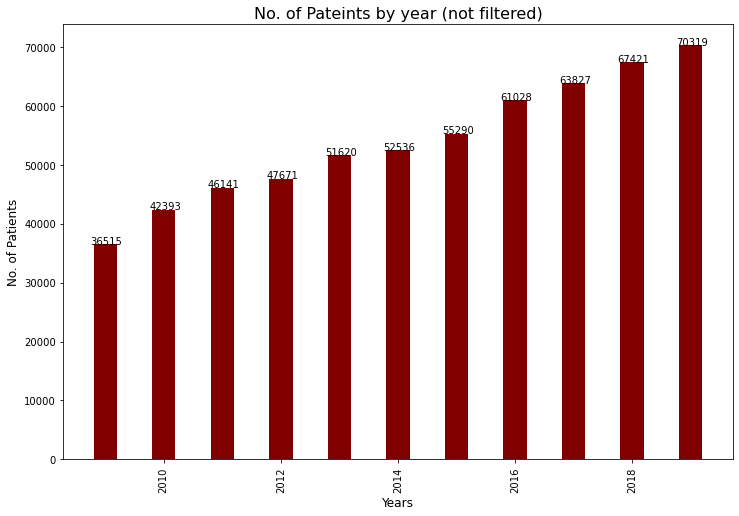

In [93]:
import numpy as  np
import matplotlib.pyplot as plt

nums = []
years = []
all_attandences = attandences
all_attandences = np.array(all_attandences)
for i in range(11):
    years.append(2009 + i)
    nums.append(np.sum(all_attandences[:, i]))

plt.figure(figsize=(12, 8))
plt.bar(years, nums, color ='maroon', width = 0.4)
 
for a,b in zip(years, nums): 
    plt.text(a-0.25, b+1, str(b))

plt.xticks(rotation=90)
plt.xlabel("Years", fontsize=12)
plt.ylabel("No. of Patients", fontsize=12)
plt.title("No. of Pateints by year (not filtered)", fontsize=16)
plt.show()

[2, 1, 1, 1, 3, 11, 1, 4, 5, 2, 10, 5, 8, 4, 7, 1, 3, 1, 6, 6, 1, 1, 2, 6, 7, 9, 2, 8, 3, 4, 6, 1, 3, 1, 1, 5, 3, 6, 10, 6, 4, 4, 1, 7, 2, 9, 5, 4, 1, 1, 5, 3, 6, 9, 9, 3, 7, 1, 6, 5, 8, 1, 4, 6, 5, 1, 2, 1, 11, 1, 9, 2, 7, 2, 8, 2, 3, 7, 11, 11, 1, 6, 1, 11, 11, 7, 11, 8, 3, 1, 8, 4, 2, 7, 1, 3, 6, 8, 4, 2, 1, 1, 1, 11, 10, 10, 11, 9, 5, 2, 9, 6, 3, 3, 3, 2, 1, 1, 8, 2, 3, 1, 5, 1, 11, 5, 3, 4, 3, 1, 3, 5, 1, 6, 5, 9, 1, 2, 11, 4, 1, 2, 5, 1, 5, 3, 5, 11, 11, 3, 7, 2, 7, 8, 1, 1, 1, 6, 8, 1, 11, 11, 6, 8, 3, 4, 5, 1, 9, 1, 4, 4, 10, 7, 1, 2, 3, 3, 3, 8, 11, 2, 9, 4, 3, 1, 2, 5, 1, 9, 11, 7, 5, 4, 8, 1, 4, 1, 1, 11, 1, 10, 3, 2, 7, 5, 8, 7, 6, 10, 11, 11, 7, 11, 8, 3, 2, 4, 1, 5, 1, 2, 7, 3, 11, 5, 11, 1, 4, 2, 5, 9, 6, 4, 5, 1, 6, 8, 9, 3, 8, 11, 5, 9, 2, 10, 2, 10, 5, 3, 4, 1, 1, 3, 9, 1, 2, 1, 2, 1, 2, 10, 10, 10, 1, 11, 2, 11, 3, 3, 2, 2, 1, 6, 4, 1, 3, 1, 2, 5, 3, 11, 11, 4, 9, 2, 2, 3, 2, 1, 9, 5, 8, 1, 5, 1, 9, 2, 4, 2, 6, 6, 2, 11, 3, 9, 9, 4, 3, 3, 9, 7, 7, 2, 11, 5, 11, 11, 7

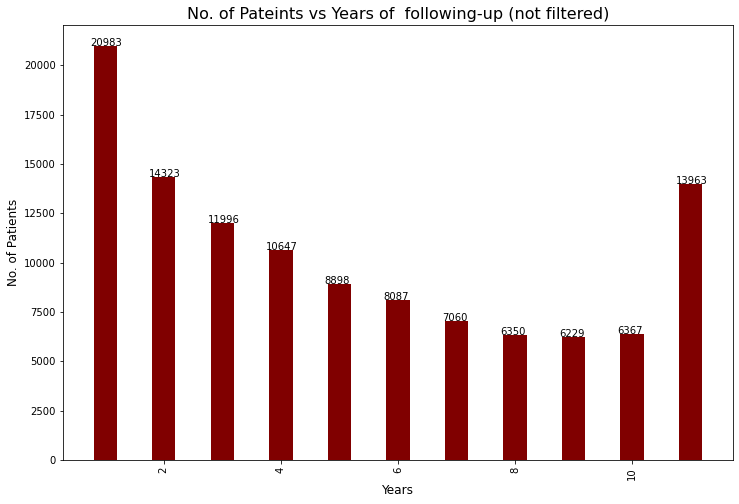

In [94]:
# F/U
fu_list = list(np.sum(all_attandences,axis=1))
fu_times = []
print(fu_list)
for i in range(1,12):
    fu_times.append(fu_list.count(i))
    
years = range(1,12)
nums = fu_times
plt.figure(figsize=(12, 8))
plt.bar(years, nums, color ='maroon', width = 0.4)
 
for a,b in zip(years, nums): 
    plt.text(a-0.25, b+1, str(b))

plt.xticks(rotation=90)
plt.xlabel("Years", fontsize=12)
plt.ylabel("No. of Patients", fontsize=12)
plt.title("No. of Pateints vs Years of  following-up (not filtered)", fontsize=16)
plt.show()



In [ ]:
import os
import pandas as pd
all_ids = []
medication_year_dict_ = {}
root_dir = 'C:\\Users\\coved\\Desktop\\CDADS\\Summary\\overall\\'
for filename in os.listdir(root_dir):
    if 'Summary' in filename:
        year = filename[-9:-5]
        excel_file = pd.read_excel(root_dir + filename)
        filtered_subjects = excel_file[excel_file.iloc[:,1]>180]
        all_ids += list(filtered_subjects["Reference_id"])
        if year not in medication_year_dict_:
            medication_year_dict_[year] = [float(i) for i in list(filtered_subjects["Reference_id"])]
        else:
            for i in list(filtered_subjects["Reference_id"]):
                medication_year_dict_[year].append(float(i))
            
            
all_ids = list(dict.fromkeys([float(i) for i in all_ids])) 
print(len(all_ids))

from tqdm import tqdm

# Question 1 and 2
all_attandences_ = []
for per_subject in tqdm(all_ids):
    attandences = [per_subject, 0,0,0,0,0,0,0,0,0,0,0]
    for year in range(2009,2020,1):
        if per_subject in medication_year_dict_[str(year)]:
            attandences[year-2008] = 1
    all_attandences_.append(attandences[1:])

In [ ]:
import numpy as  np
import matplotlib.pyplot as plt

nums = []
years = []
all_attandences_ = np.array(all_attandences_)
for i in range(11):
    years.append(2009 + i)
    nums.append(np.sum(all_attandences_[:, i]))

plt.figure(figsize=(12, 8))
plt.bar(years, nums, color ='maroon', width = 0.4)
 
for a,b in zip(years, nums): 
    plt.text(a-0.25, b+1, str(b))

plt.xticks(rotation=90)
plt.xlabel("Years", fontsize=12)
plt.ylabel("No. of Patients", fontsize=12)
plt.title("No. of Pateints by year (filtered >= 180)", fontsize=16)
plt.show()

In [ ]:
# F/U
fu_list = list(np.sum(all_attandences_,axis=1))
fu_times = []

for i in range(1,11):
    fu_times.append(fu_list.count(i))
    
years = range(1,11)
nums = fu_times
plt.figure(figsize=(12, 8))
plt.bar(years, nums, color ='maroon', width = 0.4)
 
for a,b in zip(years, nums): 
    plt.text(a-0.25, b+1, str(b))

plt.xticks(rotation=90)
plt.xlabel("Years", fontsize=12)
plt.ylabel("No. of Patients", fontsize=12)
plt.title("No. of Pateints vs Years of  following-up (filtered >= 180)", fontsize=16)
plt.show()



In [ ]:
medication_id_dict = {}

for id_name in all_ids:
    for year in medication_year_dict.keys():
        if id_name in medication_year_dict[year]:
            if id_name not in medication_id_dict.keys():
                medication_id_dict[id_name] = [year]
            else:
                medication_id_dict[id_name].append(year)

In [ ]:
len(list(medication_id_dict.keys()))

In [ ]:
for row in operations_tables.values:
    print(row)

In [ ]:
# 
single_operations_year = {}
for idname in operations_tables['Reference Key'].value_counts().keys():
    if operations_tables['Reference Key'].value_counts()[idname] == 1:
        single_operations.append(idname)
        idx = list(operations_tables['Reference Key']).index(idname)
        year = list(operations_tables['Principal Procedure Date (yyyy-mm-dd)'])[idx][:4]
        if float(year) != 2009 and float(year) != 2019:
            single_operations_year[float(idname)] = float(year)


no_med_operation_no_med_counter = 0
med_operation_no_med_counter = 0
for idname in single_operations_year.keys():
    try:

        # med_operation_no_med_counter
        left_status = False
        right_status = False
        for i in medication_id_dict[idname]:
            if float(i) <= single_operations_year[idname]:
                left_status = True
        for i in medication_id_dict[idname]:
            if float(i) > single_operations_year[idname]:
                right_status = True
        if left_status and right_status:
            med_operation_no_med_counter += 1
        
    except:
        no_med_operation_no_med_counter+=1
print(no_med_operation_no_med_counter)
print(med_operation_no_med_counter)

In [ ]:
# more than 2 opeations

single_operations_year = {}
for idname in operations_tables['Reference Key'].value_counts().keys():
    if operations_tables['Reference Key'].value_counts()[idname] > 1:
        single_operations.append(idname)
        idxs = [i for i,val in enumerate(list(operations_tables['Reference Key'])) if val==idname]
        for idx in idxs:
            year = list(operations_tables['Principal Procedure Date (yyyy-mm-dd)'])[idx][:4]
            if float(year) != 2009 and float(year) != 2019:
                if float(idname) not in single_operations_year.keys():
                    single_operations_year[float(idname)] = [float(year)]
                else:
                    single_operations_year[float(idname)].append(float(year))

for key in single_operations_year.keys():
    single_operations_year[key] = sorted(single_operations_year[key])
print(len(single_operations_year.keys()))
    
no_med_operation_no_med_counter = 0
med_operation_no_med_counter = 0
for idname in single_operations_year.keys():
    print(single_operations_year[idname])
    try:
        # med_operation_no_med_counter
        left_status = False
        right_status = False
        middle_status = False
        for i in medication_id_dict[idname]:
            if float(i) <= single_operations_year[idname][0]:
                left_status = True
        for i in medication_id_dict[idname]:
            if float(i) > single_operations_year[idname][0] and float(i) <= single_operations_year[idname][-1]:
                middle_status = True
        for i in medication_id_dict[idname]:
            if float(i) > single_operations_year[idname][-1]:
                right_status = True
        if  not left_status and  middle_status and not right_status:
            med_operation_no_med_counter += 1
        
    except:
        no_med_operation_no_med_counter+=1
print(no_med_operation_no_med_counter)
print(med_operation_no_med_counter)

In [101]:
import random
import pandas as pd

df = pd.read_csv('Overall_10 year follow-up_all combined excel drug_11years_HKWC_6753.csv').values[:,0]
df_random = random.sample(list(df), k=50)
for x in df_random:
    print(x)

2740859.0
2845795.0
2695861.0
2109494.0
671532.0
9804026.0
2923722.0
2118361.0
914429.0
5329587.0
5024349.0
6689230.0
4604.0
4939405.0
6850714.0
5985674.0
12114535.0
4696623.0
3565421.0
11073243.0
4029883.0
868978.0
10442329.0
6478889.0
2968414.0
6205433.0
916360.0
8663659.0
6330688.0
865942.0
2116349.0
294731.0
4494691.0
7019324.0
4606588.0
4450516.0
183420.0
6635734.0
871554.0
5914316.0
7162700.0
878941.0
5564209.0
5201097.0
5169513.0
10173376.0
2607467.0
903772.0
8125040.0
2363131.0
